# 1.Lý do chọn đề tài

# 2. Loading data

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("C:/Users/PC-FPTSHOP/Desktop/BTL/heart_disease (2).csv")

In [65]:
df.head()

,thalach,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time,cholestor( mg/dl),DEATH_EVENT
0,168.0,1,34.92,0,20,1,265.00,1,0,4,212,1
1,155.0,1,10.57,0,38,1,263.36,1,0,6,203,1
2,125.0,1,8.76,0,20,1,162.00,1,1,7,204,1
3,161.0,1,6.66,0,20,1,210.00,1,0,7,203,1
4,106.0,1,9.60,1,20,1,327.00,0,0,8,294,1


In [66]:
df.shape

(299, 12)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   thalach                   299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   sex                       299 non-null    int64  
 8   smoking                   299 non-null    int64  
 9   time                      299 non-null    int64  
 10  cholestor( mg/dl)         299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [68]:
# nêu rõ các cột của dataset

# 3. Explore Data Analysis (EDA): Phân tích và trực quan hóa dữ liệu

In [69]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    161
1    138
Name: count, dtype: int64

In [70]:
# df["DEATH_EVENT"].value_counts(normalize = True) # theo %

### 1. Phân tích đơn biến

#### 1.1 Các biến phân loại
* anaemia
* diabetes
* high_blood_pressure
* sex
* smoking
* DEATH_EVENT

In [71]:
categorical_list = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

C:\Users\PC-FPTSHOP\AppData\Local\Temp\ipykernel_5996\2933292818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_list[i], palette='Blues', ax=ax_i, legend = False)
C:\Users\PC-FPTSHOP\AppData\Local\Temp\ipykernel_5996\2933292818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_list[i], palette='Blues', ax=ax_i, legend = False)
C:\Users\PC-FPTSHOP\AppData\Local\Temp\ipykernel_5996\2933292818.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_list[i], palette

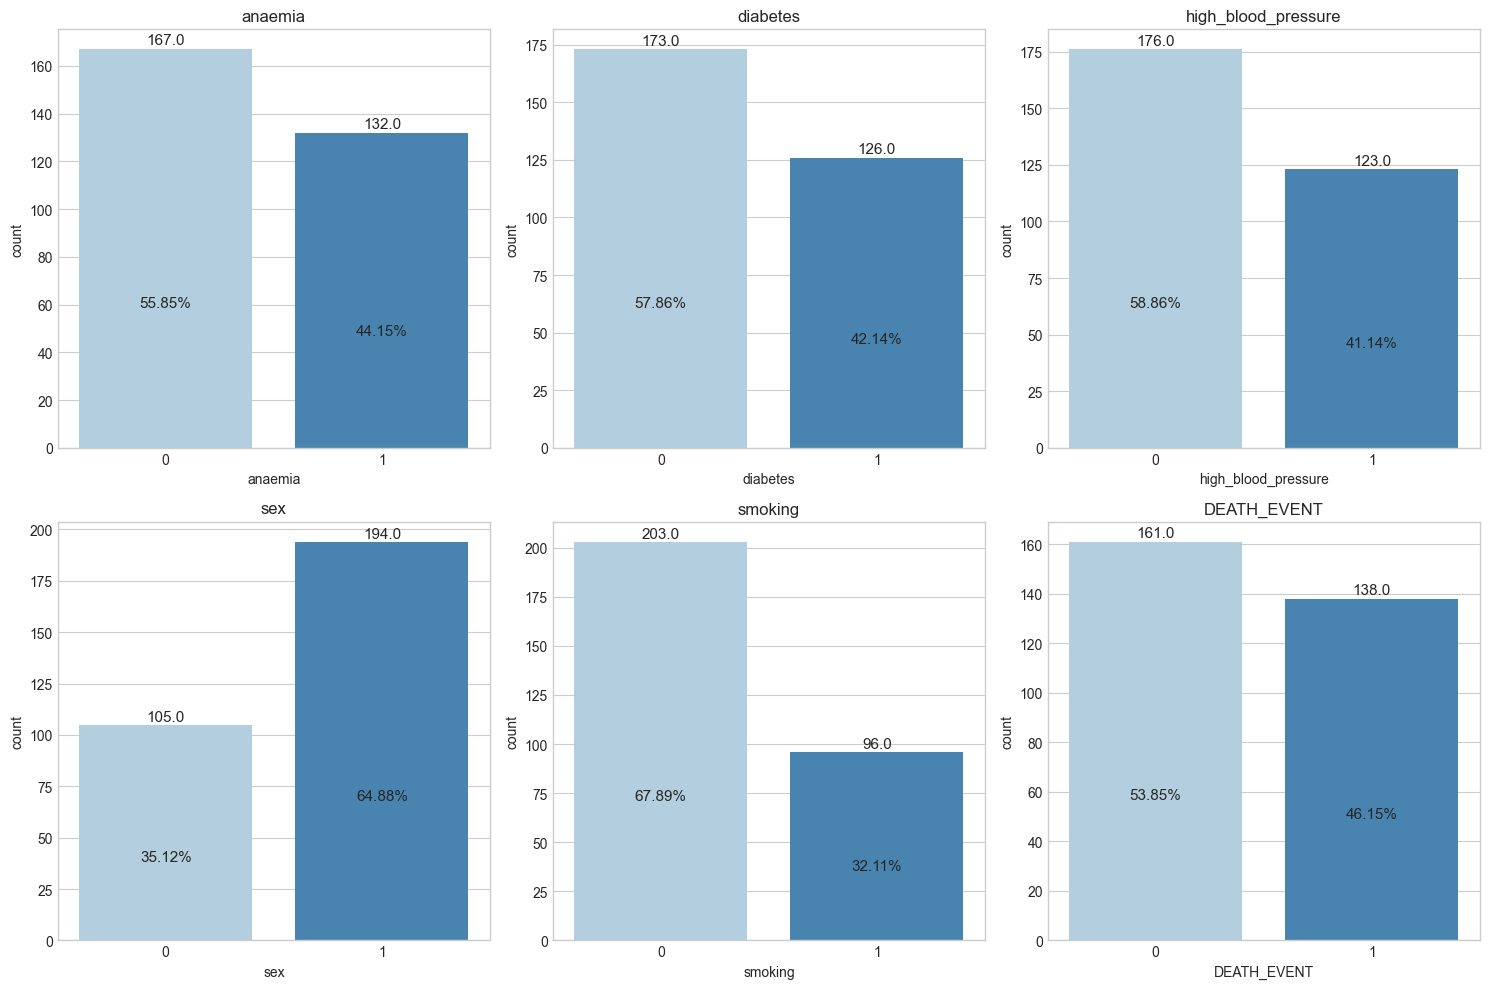

In [72]:
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index list cols
        if(i < len(categorical_list)):
            ax_i = ax[r,c]
            sns.countplot(data=df, x=categorical_list[i], palette='Blues', ax=ax_i, legend = False)
            ax_i.set_title(f"{categorical_list[i]}")
            total_height = sum([p.get_height() for p in ax_i.patches]) # Tổng chiều cao của tất cả các cột
            for rect in ax_i.patches:
                height = rect.get_height() / total_height * 100 # Tính phần trăm chiều cao của cột
                ax_i.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11) # hiển thị theo số lượng
                ax_i.text(rect.get_x() + rect.get_width()/2., height + 2, f'{height:.2f}%', ha='center', va='bottom', fontsize=11) # Hiển thị phần trăm 
plt.tight_layout() # ko chồng đồ thị

In [73]:
# đánh giá 

### 1.2. Các biến số 
* thalach
* creatinine_phosphokinase
* ejection_fraction
* platelets
* time
* cholestor

In [74]:
numerical_list = ['thalach', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'time', 'cholestor( mg/dl)']

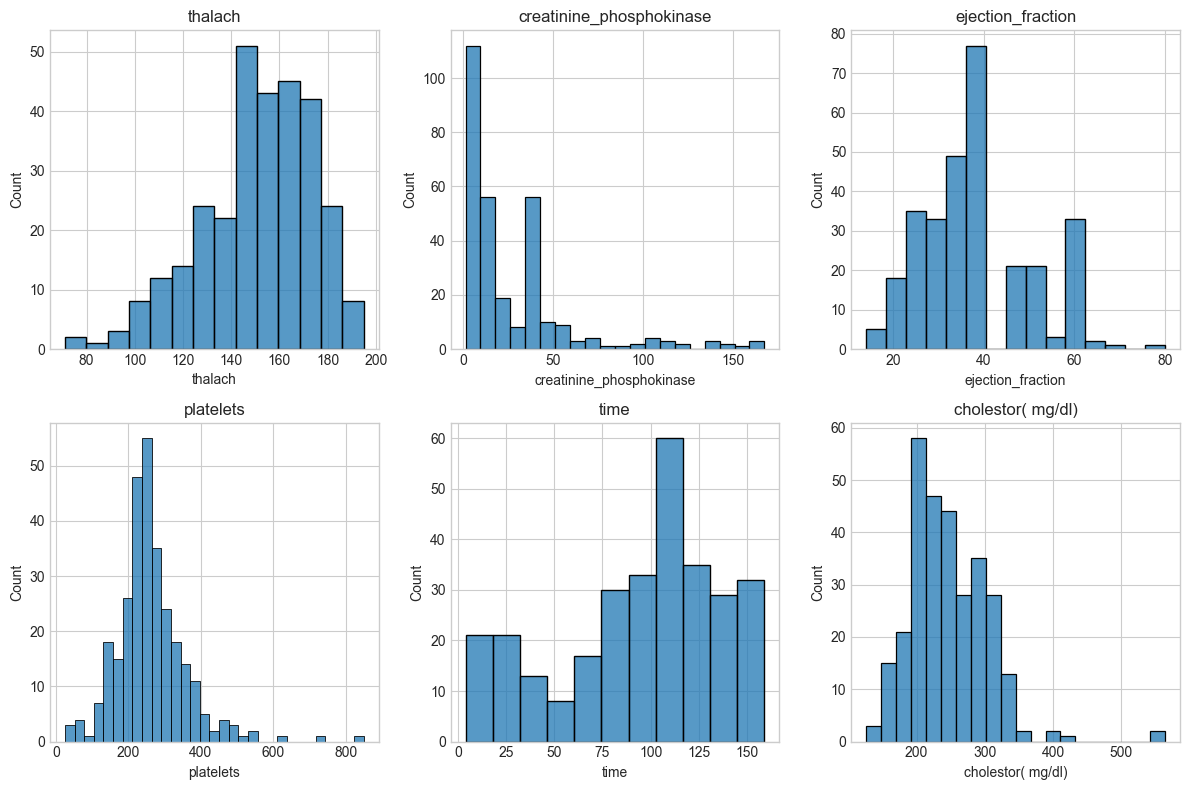

In [75]:
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4,n_rows*4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index list cols
        if(i < len(numerical_list)):
            ax_i = ax[r,c]
            sns.histplot(data=df, x=numerical_list[i], ax=ax_i)
            ax_i.set_title(f"{numerical_list[i]}")
plt.tight_layout() # ko chồng đồ thị

In [76]:
# đánh giá

### 2. Phân tích 2 biến

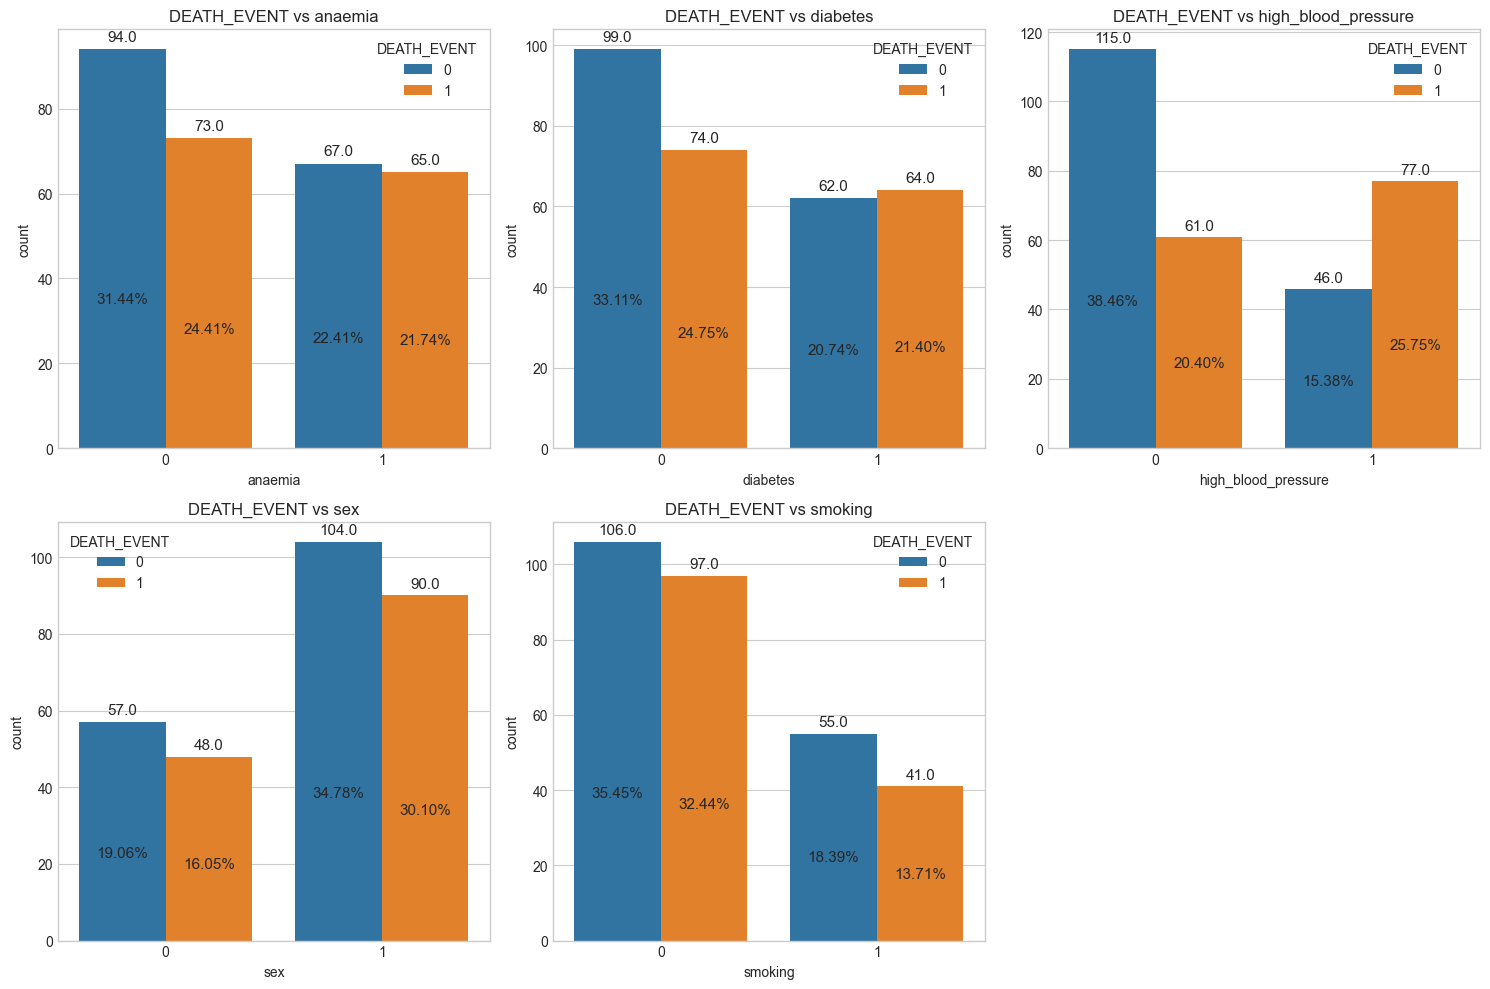

In [77]:
cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*5,n_rows*5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index list cols
        if(i < len(cols)):
            ax_i = ax[r,c]
            sns.countplot(data=df, x=cols[i], hue = 'DEATH_EVENT', ax=ax_i)
            for rect in ax_i.patches:
                height = rect.get_height() / total_height * 100 # Tính phần trăm chiều cao của cột
                if height != 0: # chỉ hiển thị nếu chiều cao khác 0
                    ax_i.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11) # hiển thị theo số lượng
                    ax_i.text(rect.get_x() + rect.get_width()/2., height + 2, f'{height:.2f}%', ha='center', va='bottom', fontsize=11) # Hiển thị phần trăm 
            ax_i.set_title(f"DEATH_EVENT vs {cols[i]}")
            ax_i.legend(title='DEATH_EVENT', labels = ['0', '1'])
ax.flat[-1].set_visible(False) # bỏ hình cuối
plt.tight_layout() # ko chồng đồ thị

In [78]:
# đánh giá theo từng biểu đồ

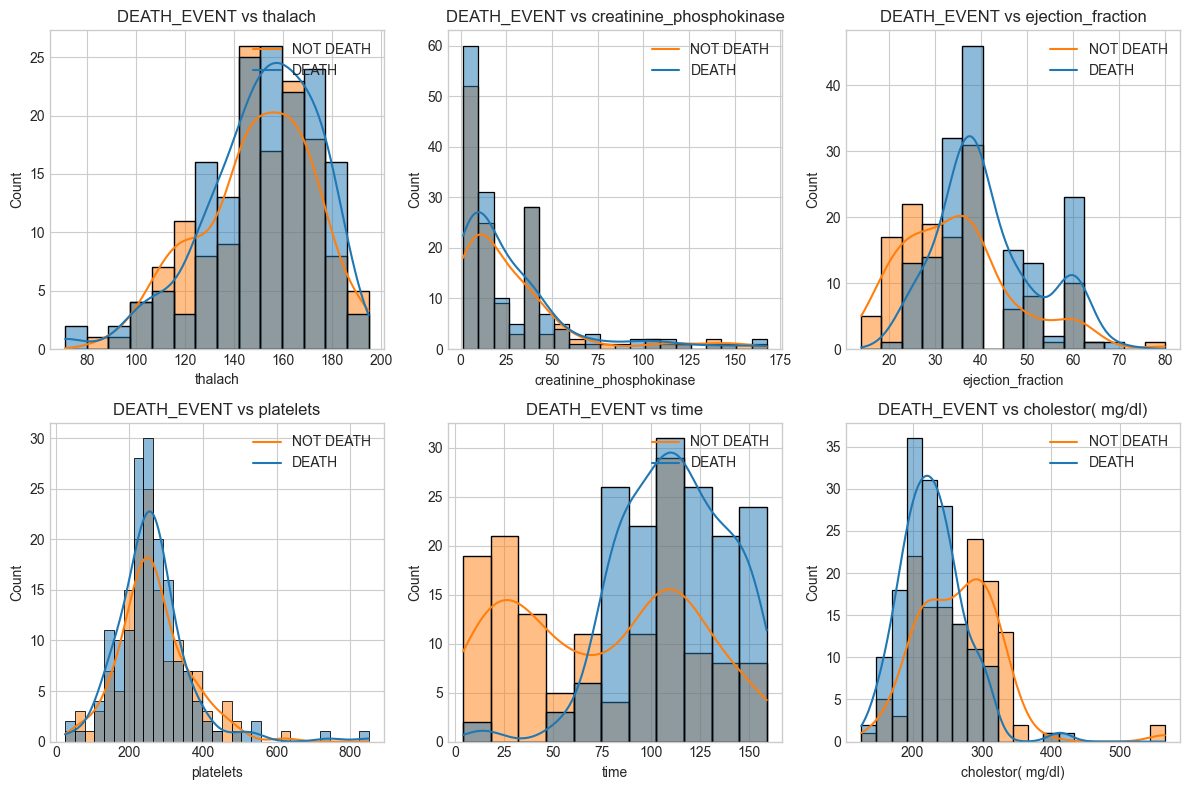

In [79]:
cols = ['thalach', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'time', 'cholestor( mg/dl)']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4,n_rows*4))
for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index list cols
        if(i < len(cols)):
            ax_i = ax[r,c]
            sns.histplot(data=df, x=cols[i], hue = 'DEATH_EVENT', kde = True, ax=ax_i)
            ax_i.set_title(f"DEATH_EVENT vs {cols[i]}")
            ax_i.legend(title='', loc='upper right', labels = ['NOT DEATH', 'DEATH'])
plt.tight_layout() # ko chồng đồ thị

### Ma trận tương quan giữa các dữ liệu

In [80]:
df.corr()

,thalach,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time,cholestor( mg/dl),DEATH_EVENT
thalach,1.000000,0.002187,-0.079513,0.006207,0.077295,-0.025767,-0.130618,0.004548,-0.086090,0.049716,-0.055472,-0.043178
anaemia,0.002187,1.000000,-0.144817,-0.035811,-0.002261,0.023255,-0.050552,-0.079658,-0.106481,-0.179952,0.017826,0.055082
creatinine_phosphokinase,-0.079513,-0.144817,1.000000,0.057300,-0.050549,-0.046898,-0.003176,0.019861,-0.085894,0.180655,0.063860,0.012021
diabetes,0.006207,-0.035811,0.057300,1.000000,-0.017340,-0.011463,0.092552,-0.166762,-0.151669,0.027514,0.057263,0.079429
ejection_fraction,0.077295,-0.002261,-0.050549,-0.017340,1.000000,0.027616,0.066650,-0.154326,-0.046813,0.082743,-0.097940,-0.271631
high_blood_pressure,-0.025767,0.023255,-0.046898,-0.011463,0.027616,1.000000,0.125775,-0.153862,-0.079943,-0.234717,0.036239,0.275818
platelets,-0.130618,-0.050552,-0.003176,0.092552,0.066650,0.125775,1.000000,-0.125121,0.028235,0.013358,-0.047778,0.026333
sex,0.004548,-0.079658,0.019861,-0.166762,-0.154326,-0.153862,-0.125121,1.000000,0.445892,-0.022621,0.038633,0.006487
smoking,-0.086090,-0.106481,-0.085894,-0.151669,-0.046813,-0.079943,0.028235,0.445892,1.000000,-0.017324,0.031969,-0.047529
time,0.049716,-0.179952,0.180655,0.027514,0.082743,-0.234717,0.013358,-0.022621,-0.017324,1.000000,0.048853,-0.448820


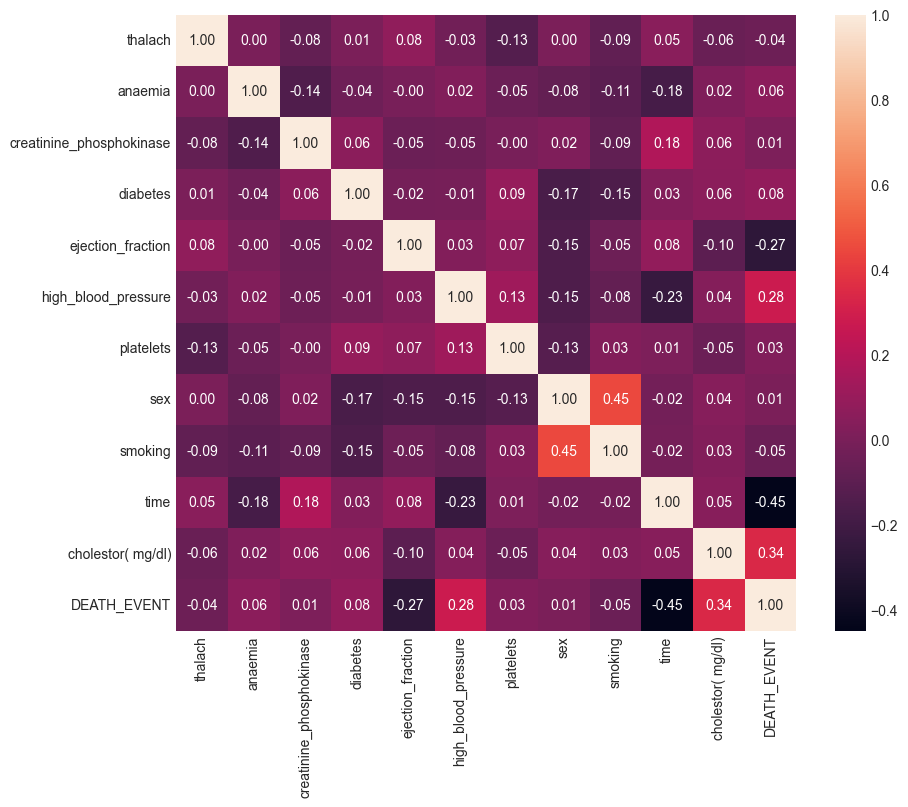

In [81]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f");

# 4. Tiền xử lý dữ liệu

In [82]:
# cân bằng
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_sm, y_sm = smote.fit_resample(X, y)
df_n = pd.DataFrame(X_sm, columns=X.columns)
df_n['DEATH_EVENT'] = y_sm

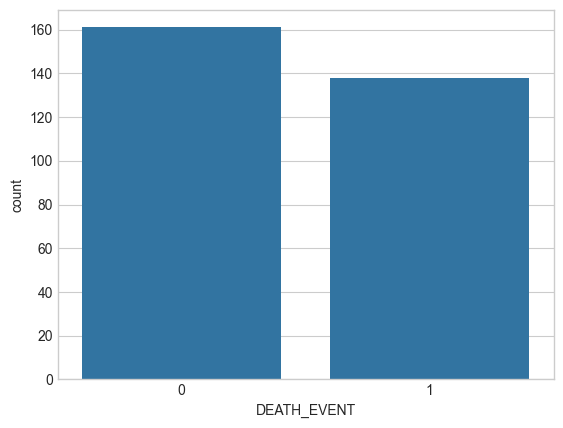

In [83]:
sns.countplot(data=df, x='DEATH_EVENT');

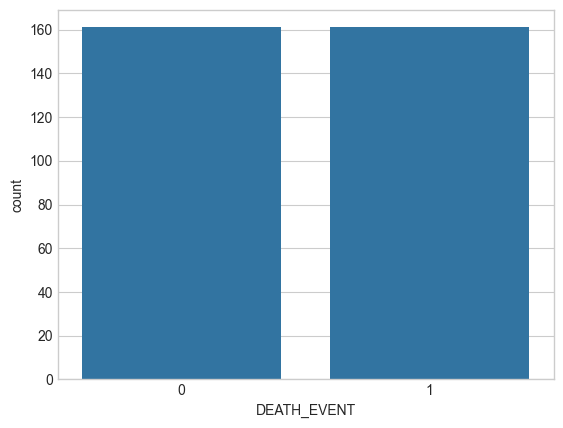

In [84]:
sns.countplot(data=df_n, x='DEATH_EVENT');

In [85]:
# scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# fit và transform đồng thời
normalized = scaler.fit_transform(df_n)
df_sc = pd.DataFrame(normalized, columns=df_n.columns)
df_sc

,thalach,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time,cholestor( mg/dl),DEATH_EVENT
0,0.782258,1.0,0.201732,0.0,0.090909,1.0,0.290823,1.0,0.0,0.000000,0.196347,1.0
1,0.677419,1.0,0.055275,0.0,0.363636,1.0,0.288835,1.0,0.0,0.012903,0.175799,1.0
2,0.435484,1.0,0.044388,0.0,0.090909,1.0,0.165960,1.0,1.0,0.019355,0.178082,1.0
3,0.725806,1.0,0.031757,0.0,0.090909,1.0,0.224148,1.0,0.0,0.019355,0.175799,1.0
4,0.282258,1.0,0.049441,1.0,0.090909,1.0,0.365984,0.0,0.0,0.025806,0.383562,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.542735,0.0,0.415077,0.0,0.136364,1.0,0.318460,1.0,0.0,0.251613,0.182648,1.0
318,0.806462,0.0,0.016417,0.0,0.651515,0.0,0.418411,0.0,0.0,0.122581,0.283105,1.0
319,0.584187,0.0,0.483072,0.0,0.166667,0.0,0.393695,0.0,0.0,0.658065,0.221461,1.0
320,0.735237,0.0,0.085668,1.0,0.378788,0.0,0.285498,0.0,0.0,0.748387,0.906393,1.0


In [86]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # fit và transform đồng thời
# normalized = scaler.fit_transform(df_n)
# df_sc = pd.DataFrame(normalized, columns=df_n.columns)
# df_sc

In [87]:
# feature selection

In [88]:
label = df_sc['DEATH_EVENT']
values = df_sc[['thalach','anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'time', 'cholestor( mg/dl)']]

from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(values, label)
dfscores = np.array(fit.scores_) 
dfcolumns = np.array(values.columns)

featureScores = pd.DataFrame({"Feature": dfcolumns, "Scores": dfscores})
featureScores['Scores'] = featureScores['Scores'].apply(lambda x : round(x,2))
featureScores = featureScores.sort_values(['Scores'], ascending=False)
featureScores

,Feature,Scores
5,high_blood_pressure,9.65
9,time,8.56
4,ejection_fraction,2.50
10,cholestor( mg/dl),2.36
8,smoking,1.47
3,diabetes,0.19
1,anaemia,0.07
2,creatinine_phosphokinase,0.03
0,thalach,0.02
6,platelets,0.00


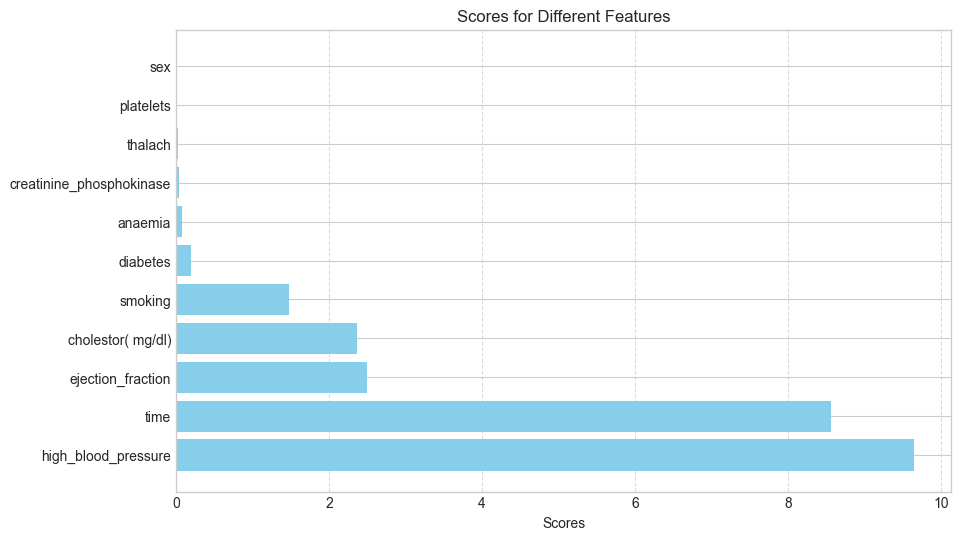

In [89]:
plt.figure(figsize=(10, 6))
plt.barh(featureScores['Feature'], featureScores['Scores'], color='skyblue')
plt.xlabel('Scores')
plt.title('Scores for Different Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [90]:
# chọn 4 feature: ejection_fraction, cholestor( mg/dl), time, high_blood_pressure

In [91]:
df_sc

,thalach,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,sex,smoking,time,cholestor( mg/dl),DEATH_EVENT
0,0.782258,1.0,0.201732,0.0,0.090909,1.0,0.290823,1.0,0.0,0.000000,0.196347,1.0
1,0.677419,1.0,0.055275,0.0,0.363636,1.0,0.288835,1.0,0.0,0.012903,0.175799,1.0
2,0.435484,1.0,0.044388,0.0,0.090909,1.0,0.165960,1.0,1.0,0.019355,0.178082,1.0
3,0.725806,1.0,0.031757,0.0,0.090909,1.0,0.224148,1.0,0.0,0.019355,0.175799,1.0
4,0.282258,1.0,0.049441,1.0,0.090909,1.0,0.365984,0.0,0.0,0.025806,0.383562,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.542735,0.0,0.415077,0.0,0.136364,1.0,0.318460,1.0,0.0,0.251613,0.182648,1.0
318,0.806462,0.0,0.016417,0.0,0.651515,0.0,0.418411,0.0,0.0,0.122581,0.283105,1.0
319,0.584187,0.0,0.483072,0.0,0.166667,0.0,0.393695,0.0,0.0,0.658065,0.221461,1.0
320,0.735237,0.0,0.085668,1.0,0.378788,0.0,0.285498,0.0,0.0,0.748387,0.906393,1.0


In [92]:
feature = ['ejection_fraction', 'cholestor( mg/dl)', 'time', 'high_blood_pressure']

In [93]:
X = df_sc[feature]
y = df_sc['DEATH_EVENT']

In [94]:
X.head()

,ejection_fraction,cholestor( mg/dl),time,high_blood_pressure
0,0.090909,0.196347,0.000000,1.0
1,0.363636,0.175799,0.012903,1.0
2,0.090909,0.178082,0.019355,1.0
3,0.090909,0.175799,0.019355,1.0
4,0.090909,0.383562,0.025806,1.0


In [95]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

# 5. Xây dựng và đánh giá mô hình

In [96]:
# Một số thuật toán machine learning như Decision Trees, Random Forests không nhất thiết cần phải scale dữ liệu 
# trước khi huấn luyện vì chúng không phụ thuộc vào tỷ lệ của các biến. 
# Tuy nhiên, các thuật toán như SVM, KNN, Neural Networks thì thường cần scale dữ liệu để đảm bảo rằng các biến có cùng tỷ lệ và đồng nhất.

In [97]:
from sklearn.model_selection import train_test_split
# chia thành 2 tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [98]:
# Áp dụng Logistic Regression
# from sklearn.linear_model import LogisticRegression 
# from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, accuracy_score

In [99]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

In [100]:
# log_reg.score(X_test, y_test) #Accuracy score

In [101]:
# y_pred = log_reg.predict(X_test)

In [102]:
# precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred)

In [103]:
# print(classification_report(y_test, y_pred))

In [104]:
# from sklearn import metrics
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

# cm_display.plot()
# plt.show()

In [105]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [106]:
def model(classifier,X_train,y_train,X_test,y_test):
    # train mô hình
    classifier.fit(X_train,y_train)
    # Đánh giá mô hình
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
    # trực quan hóa ma trận nhầm lẫn
    plot_confusion_matrix(y_test, y_pred)
    # trực quan hóa ROC-Curve điểm AUC
    plot_roc_curve(y_test, y_pred)
    print(f'AUC score: {roc_auc_score(y_test, y_pred)}')
    plt.show

In [107]:
def plot_roc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [108]:
def plot_confusion_matrix(y_test, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.grid(False)
    plt.show()

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        31
         1.0       0.84      0.76      0.80        34

    accuracy                           0.80        65
   macro avg       0.80      0.80      0.80        65
weighted avg       0.80      0.80      0.80        65



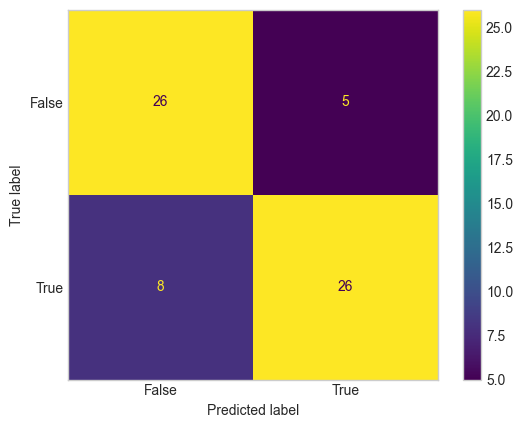

AUC score: 0.8017077798861479


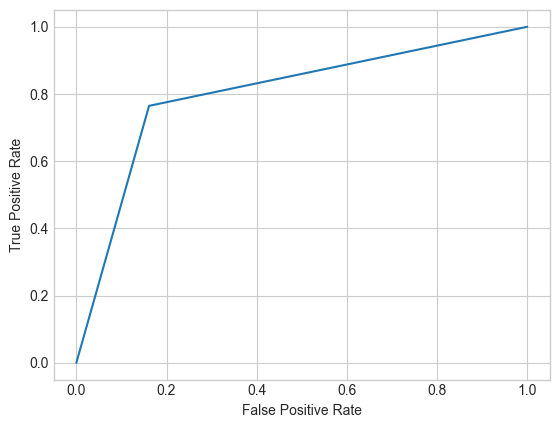

In [109]:
model(LogisticRegression(),X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.68      0.79        31
         1.0       0.77      0.97      0.86        34

    accuracy                           0.83        65
   macro avg       0.86      0.82      0.82        65
weighted avg       0.86      0.83      0.83        65



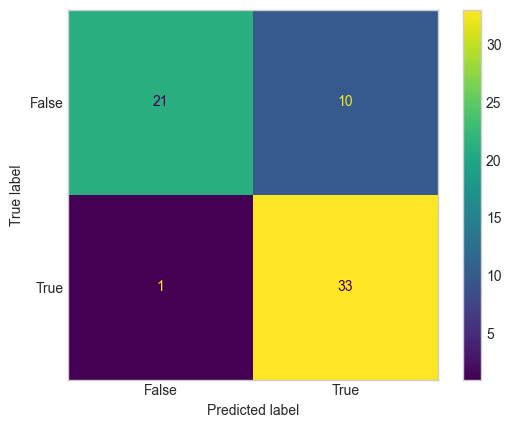

AUC score: 0.8240037950664139


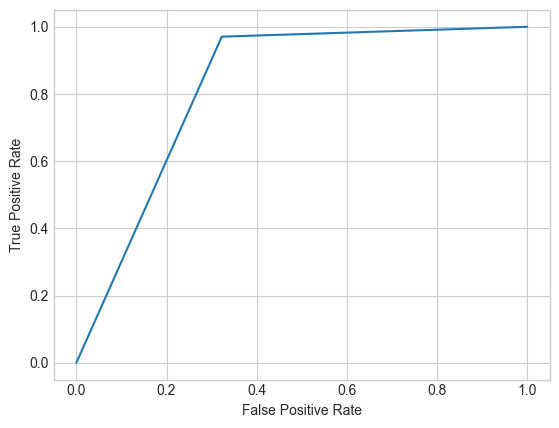

In [110]:
model(DecisionTreeClassifier(random_state=0),X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        31
         1.0       0.86      0.88      0.87        34

    accuracy                           0.86        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.86      0.86      0.86        65



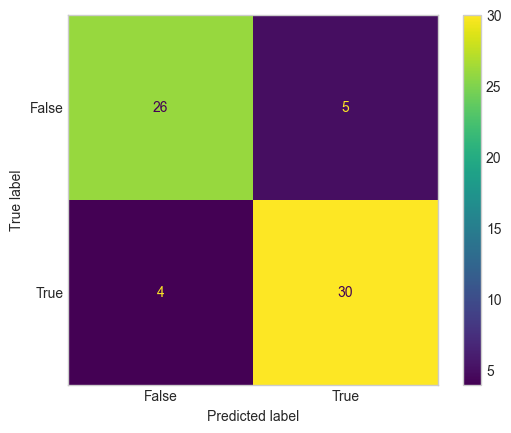

AUC score: 0.8605313092979128


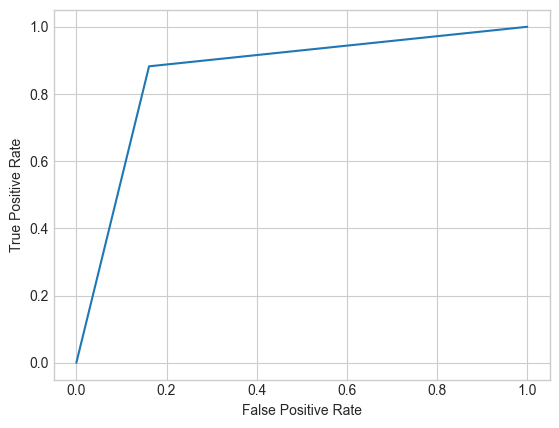

In [111]:
model(RandomForestClassifier(), X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        31
         1.0       0.81      0.76      0.79        34

    accuracy                           0.78        65
   macro avg       0.79      0.79      0.78        65
weighted avg       0.79      0.78      0.78        65



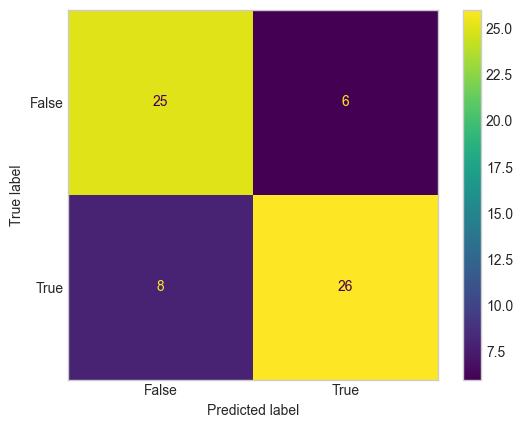

AUC score: 0.7855787476280834


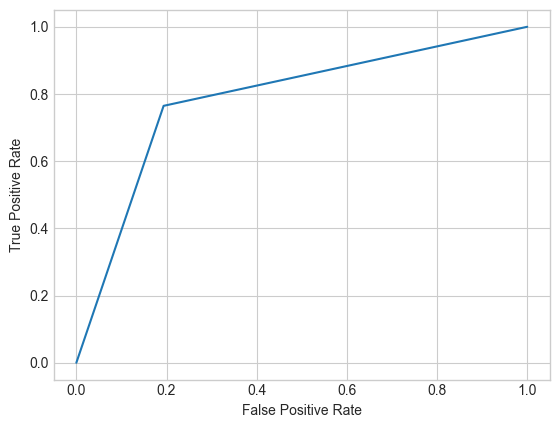

In [112]:
model(SVC(kernel = 'linear', probability = True), X_train, y_train, X_test, y_test)